# **Classification Models in Supervised Learning**
Classification is a supervised learning task where the goal is to predict discrete labels (categories). Here are some of the most commonly used classification models:

---

## **1. Logistic Regression**
- A simple linear model used for binary classification.
- Uses the sigmoid function to map predictions to probabilities.
- Works well when the data is linearly separable.

🔹 **Best For:** Binary classification problems (e.g., spam detection, medical diagnosis).

---

## **2. k-Nearest Neighbors (k-NN)**
- A non-parametric model that classifies data based on the majority vote of its k nearest neighbors.
- Does not require training; relies on distance metrics (e.g., Euclidean, Manhattan).

🔹 **Best For:** Small datasets where decision boundaries are irregular.

---

## **3. Decision Trees**
- A tree-based model that splits data based on feature conditions.
- Prone to overfitting but interpretable.

🔹 **Best For:** When interpretability is important (e.g., customer segmentation).

---

## **4. Random Forest**
- An ensemble of multiple decision trees.
- Reduces overfitting by averaging multiple tree predictions.

🔹 **Best For:** High-dimensional data, handling missing values.

---

## **5. Support Vector Machine (SVM)**
- Uses hyperplanes to separate data classes.
- Can handle non-linearly separable data with kernels (e.g., RBF kernel).

🔹 **Best For:** When the number of features is high relative to the number of samples.

---

## **6. Naïve Bayes**
- A probabilistic model based on Bayes' theorem.
- Assumes feature independence.

🔹 **Best For:** Text classification, spam filtering.

---

## **7. Neural Networks (Deep Learning)**
- Uses layers of artificial neurons to learn complex patterns.
- Can be simple (MLP) or deep (CNNs, RNNs).

🔹 **Best For:** Large datasets with high complexity (e.g., image and speech recognition).

---

## **8. Gradient Boosting Models (GBM, XGBoost, LightGBM, CatBoost)**
- Ensemble methods that build models sequentially to correct previous errors.
- Highly effective for structured/tabular data.

🔹 **Best For:** Kaggle competitions, predictive analytics.

---

## **Choosing the Right Model**
| Scenario | Suggested Model |
|----------|----------------|
| Binary Classification | Logistic Regression, SVM, Random Forest |
| Multiclass Classification | Decision Trees, Random Forest, XGBoost |
| Small Dataset | k-NN, Naïve Bayes |
| Large Dataset | Neural Networks, XGBoost |
| Text Classification | Naïve Bayes, Neural Networks |
| Image Recognition | CNNs (Deep Learning) |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

# Decision Tree Algoritham

In [2]:
df = sns.load_dataset("titanic")

In [3]:
X = df[['pclass','sex','age','sibsp','parch','fare']]
y = df['survived']

In [4]:
X

,pclass,sex,age,sibsp,parch,fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [5]:
X = pd.get_dummies(X , columns=['sex'] )

In [6]:
X.head(10)

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True
5,3,NaN,0,0,8.4583,False,True
6,1,54.0,0,0,51.8625,False,True
7,3,2.0,3,1,21.0750,False,True
8,3,27.0,0,2,11.1333,True,False
9,2,14.0,1,0,30.0708,True,False


In [7]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [8]:
X['age'] = X['age'].fillna(df['age'].mean())  # Correct way

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
model = DecisionTreeClassifier(class_weight="balanced")
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



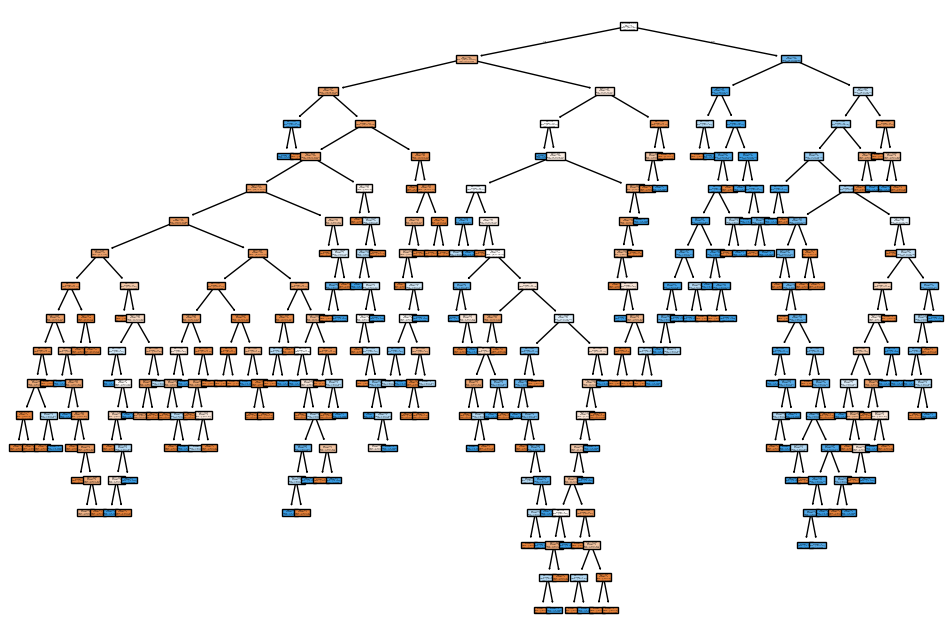

In [13]:


# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set figure size
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])

# Save the tree plot before showing it
plt.savefig("tree.pdf", dpi=300)  # Save at high resolution
plt.show()  # Now display the tree


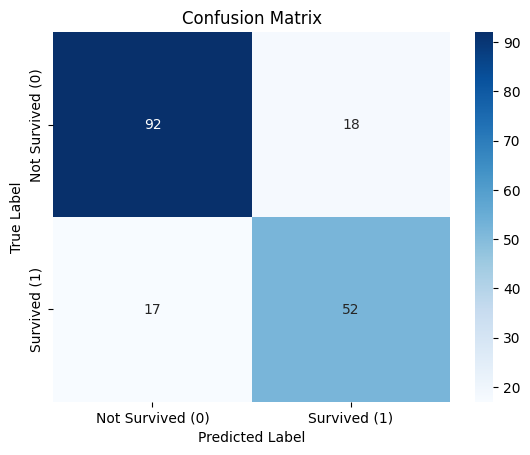

In [14]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Define custom labels
labels = ["Not Survived (0)", "Survived (1)"]

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# K-Nearest Neibhour Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
model_k = KNeighborsClassifier(n_neighbors=5)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       110
           1       0.73      0.59      0.66        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179



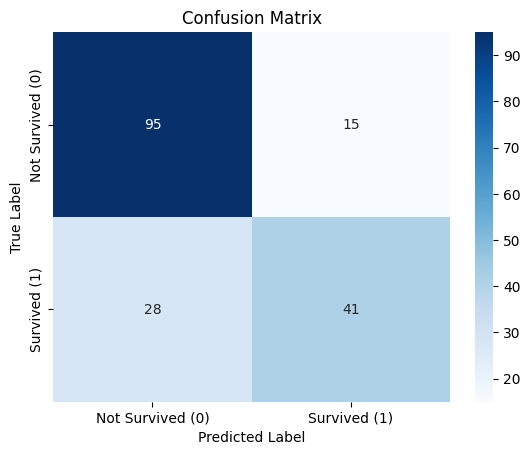

In [17]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Define custom labels
labels = ["Not Survived (0)", "Survived (1)"]

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier()
model_r.fit(X_train, y_train)
y_pred = model_r.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model_l = LogisticRegression()
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



# All Models Of Clasification


Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


k-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg     

C:\Users\abuba\AppData\Local\Temp\ipykernel_9560\2396148718.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


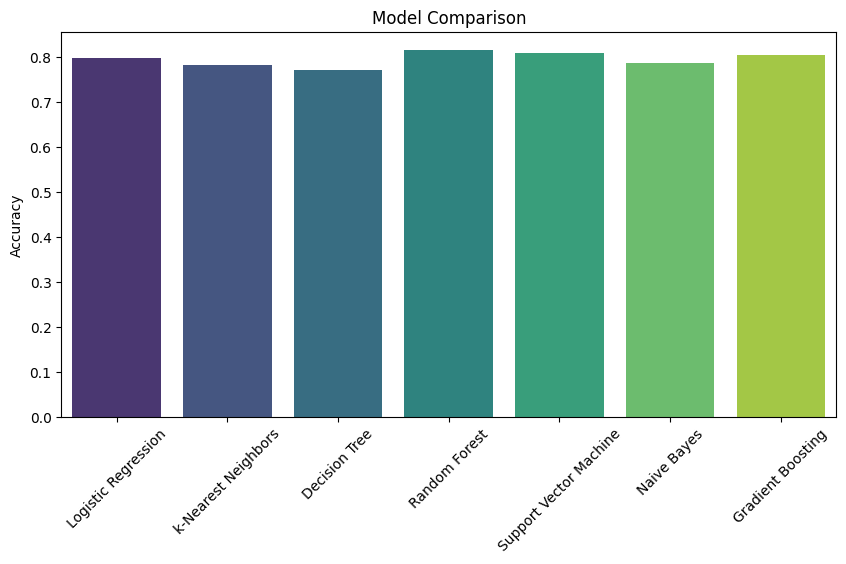

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Assume X, y are already defined (features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, needed for some models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print classification report
    print(classification_report(y_test, y_pred))

# Plot model performance
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Assume X, y are already defined (features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Perform cross-validation
cv_results = {}

for name, model in models.items():
    print(f"\n{name}: ")
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    
    # Store the mean accuracy and standard deviation
    cv_results[name] = {"Mean Accuracy": scores.mean(), "Std Dev": scores.std()}
    
    print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

# Convert results to DataFrame for better visualization
cv_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:\n")
cv_df.head(10)




Logistic Regression: 
Cross-Validation Accuracy: 0.79 ± 0.07

k-Nearest Neighbors: 
Cross-Validation Accuracy: 0.81 ± 0.07

Decision Tree: 
Cross-Validation Accuracy: 0.75 ± 0.04

Random Forest: 
Cross-Validation Accuracy: 0.80 ± 0.03

Support Vector Machine: 
Cross-Validation Accuracy: 0.83 ± 0.07

Naive Bayes: 
Cross-Validation Accuracy: 0.79 ± 0.08

Gradient Boosting: 
Cross-Validation Accuracy: 0.83 ± 0.05

Cross-Validation Results:



,Mean Accuracy,Std Dev
Logistic Regression,0.793505,0.071051
k-Nearest Neighbors,0.810407,0.065754
Decision Tree,0.752817,0.038727
Random Forest,0.796362,0.033949
Support Vector Machine,0.828599,0.068404
Naive Bayes,0.793466,0.083384
Gradient Boosting,0.831397,0.053221


In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    }
}

best_models = {}
for name, param_grid in param_grids.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(models[name], param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}\n")


# Evaluate best models on the test set
print("\nFinal Model Evaluations on Test Set:\n")


for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Test Accuracy = {accuracy:.4f}")


Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7977

Tuning hyperparameters for k-Nearest Neighbors...
Best parameters for k-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy: 0.8216

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3}
Best cross-validation accuracy: 0.8244

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.8357

Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8258

Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best cross-va

## 🧠 What is a Confusion Matrix?

A **Confusion Matrix** is a **performance measurement tool** for classification problems in Machine Learning.

It tells you:

* **How many predictions were correct**
* **Where the model made mistakes**
* **What kind of mistakes** were made

It is mostly used for **binary classification**, but can also be extended to multi-class problems.


## 📊 Basic Structure of a Confusion Matrix (for Binary Classification)

Let’s say you have two classes:

* **Positive** (e.g. person has disease)
* **Negative** (e.g. person is healthy)

|                      | **Predicted: Positive** | **Predicted: Negative** |
| -------------------- | ----------------------- | ----------------------- |
| **Actual: Positive** | True Positive (TP)      | False Negative (FN)     |
| **Actual: Negative** | False Positive (FP)     | True Negative (TN)      |

---

## ✅ Explanation of the Terms

* **True Positive (TP):** Model predicted **Positive**, and it was actually **Positive**
* **True Negative (TN):** Model predicted **Negative**, and it was actually **Negative**
* **False Positive (FP):** Model predicted **Positive**, but it was actually **Negative** (also called **Type I Error**)
* **False Negative (FN):** Model predicted **Negative**, but it was actually **Positive** (also called **Type II Error**)

---

## 💡 Example

Suppose your model predicts whether a person has diabetes.

* 100 people tested
* Actual diabetic: 40
* Actual non-diabetic: 60

Your model results:

|                      | Predicted: Diabetic | Predicted: Not Diabetic |
| -------------------- | ------------------- | ----------------------- |
| Actual: Diabetic     | 30 (TP)             | 10 (FN)                 |
| Actual: Not Diabetic | 5 (FP)              | 55 (TN)                 |

---

## 🧮 Metrics from Confusion Matrix

You can calculate these **important evaluation metrics**:

### 1. **Accuracy**

> How many total predictions were correct?

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

### 2. **Precision**

> When model said **Positive**, how often was it correct?

$$
Precision = \frac{TP}{TP + FP}
$$

### 3. **Recall (Sensitivity)**

> How many actual **Positives** were identified?

$$
Recall = \frac{TP}{TP + FN}
$$

### 4. **F1 Score**

> Harmonic mean of Precision and Recall:

$$
F1 = 2 \times \frac{Precision \cdot Recall}{Precision + Recall}
$$
